<a href="https://colab.research.google.com/github/RodrigoGuedesDP/IA/blob/main/Machine%20Learning/Maestr%C3%ADa_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Topic 6: Dimensionality reduction
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        :  Dimensionality reduction \\

   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: Sergio Herrera
 - Integrante 2: Christian Frisancho
 - Integrante 3: (%)
 - Integrante 4: (%)


 ----

# PCA: Eigen descomposition



In this practice your team will receive 2410 images grouped into 38 classes, where each class represents images of the face of the same person.

- Remember the Egen decomposition: $M V= \lambda V$
- For this example: $faces*Eigenfaces = \lambda Eigenfaces$
- faces: It is a matrix where each row represents an image.
- EigenFaces: They are the eigenvectors that are obtained after the egendecomposition.

Below you are provided with the Load_data code that allows you to read the images from the file. This function returns the images in matrix form and their labels for subsequent classification tasks.

Dataset: https://drive.google.com/file/d/1X8-AJiG0_qW08rx5l8u1Vs3cmx5W8ETj/view?usp=sharing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import seaborn as sns
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.metrics import f1_score


from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/UTEC/"

def Load_data(file):
  faces_m_format = scipy.io.loadmat(file)
  faces = faces_m_format['faces']
  m = int(faces_m_format['m'])
  n = int(faces_m_format['n'])
  nfaces = np.ndarray.flatten(faces_m_format['nfaces'])

  y = np.zeros((faces.shape[1],))
  j = 0
  classes = list(range(len(nfaces)))
  for i in nfaces:
    y[j:j+i] = classes.pop(0)
    j = j + i

  print("Total dataset size:")
  print(f"n_samples: {faces.shape[1]}")
  print(f"n_features: {m*n}")
  print(f"n_classes: {len(nfaces)}")
  return faces, y,m,n

X,Y,m,n = Load_data(path + 'allFaces.mat')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total dataset size:
n_samples: 2410
n_features: 32256
n_classes: 38


<ipython-input-62-971138596>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(faces_m_format['m'])
<ipython-input-62-971138596>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(faces_m_format['n'])
<ipython-input-62-971138596>:26: RuntimeWarning: overflow encountered in scalar add
  y[j:j+i] = classes.pop(0)
<ipython-input-62-971138596>:27: RuntimeWarning: overflow encountered in scalar add
  j = j + i


# Viewing the images
The Plot_Face function is used to plot the images. Remember that each image is a vector, so internally it is transformed into a
matrix of the correct dimensions of the image to be displayed. Here is an example when viewing image 4

(32256, 2410)


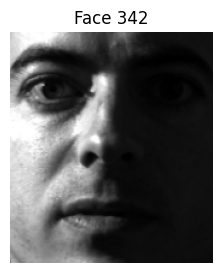

In [ ]:
def Plot_Face(image_vec, i,title):
  fig1 = plt.figure(figsize=(10, 3))
  image = image_vec.reshape((m,n))
  img = plt.imshow(image.T)
  img.set_cmap('gray')
  plt.title(title  + str(i))
  plt.axis('off')
  plt.show()

print(X.shape)
Plot_Face(X[:,342], 342, 'Face ')


# PCA dimensional Reduction
Use Principal Component Analysis to obtain the K eigen vectors with the highest variance. You can use  [PCA - Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
#Write your code here
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
X = X.T
print(X.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
componentes= 100


pca = PCA(n_components = componentes)


X_pca = pca.fit_transform(X)

eigenvectors = pca.components_

explained_variance = pca.explained_variance_ratio_

print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Varianza explicada por los primeros {componentes}: {np.sum(explained_variance)}")

X_reconstructed = pca.inverse_transform(X_pca)



(2410, 32256)
Varianza explicada por cada componente: [0.3842146  0.12991182 0.06761821 0.02830651 0.02002507 0.01839005
 0.01638729 0.01555928 0.01521419 0.01333448 0.01260544 0.0111421
 0.01016119 0.0083021  0.00791605 0.0072852  0.00661176 0.00627405
 0.00610055 0.0057626  0.00538305 0.00507998 0.00492784 0.00427356
 0.00409616 0.00395672 0.00382561 0.0035914  0.00352727 0.00337869
 0.00322704 0.00309624 0.00305023 0.00280758 0.00270513 0.00268365
 0.00259458 0.00250692 0.00238191 0.00234288 0.00229432 0.00219128
 0.00210482 0.00207541 0.00199321 0.00193563 0.00189969 0.00181227
 0.00177578 0.00174459 0.00172024 0.00164641 0.00159759 0.00159561
 0.00157512 0.00151738 0.00147856 0.00140351 0.00136586 0.00135246
 0.00133364 0.00129575 0.00127305 0.00123987 0.001211   0.00118458
 0.00117644 0.00112571 0.00109791 0.00106864 0.00105307 0.00102218
 0.00100794 0.00097746 0.00096691 0.0009458  0.00091986 0.00090057
 0.00088877 0.00088087 0.00087323 0.00086505 0.00085181 0.00083397
 0.000810

# Analyzing the components
Project the original data to the k most relevant components. Use fit_tranform to get the transformed data.
- Print or show the applied variance ratio and decide on the most relevant K eigenvectors
- Plot the k components using the Plot_Face function. Remember that the function will internally transform the vector into a matrix.
- The images you can see are called eigenfaces in this case.
- This tells us that any face can be reconstructed with a linear combination of these eigenfaces. <font color='red'> !!!Great right?</font> 😊😊

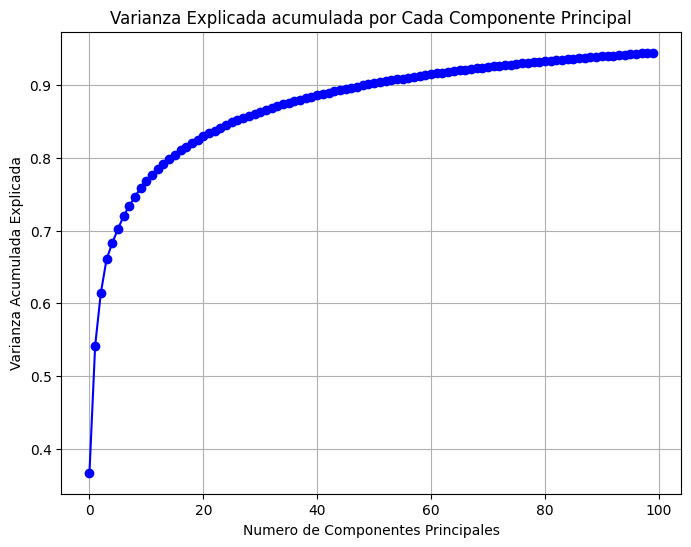

El número de componentes principales necesarios para explicar el 95% de la varianza es: 1
Número de coponentes seleccionados : 1


ValueError: cannot reshape array of size 241000 into shape (1,168,192)

In [ ]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Varianza Explicada acumulada por Cada Componente Principal')
plt.xlabel('Numero de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.show()

K = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"El número de componentes principales necesarios para explicar el 95% de la varianza es: {K}")
print("Número de coponentes seleccionados :", K)
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)
pca.transform(new_Data)


# eigenfaces = pca.components_.reshape((K, m, n))

# for i in range(K):
#     Plot_Face(eigenfaces[i], i, 'Eigenface ')



# Clustering.

**Congratulations**, your team has managed to transform the face matrix from an Nxd matrix to an Nxk matrix, where k << d. You have managed to reduce the dimensionality. Very good... 😊😊



Now, with this new data and with the same Y labels, the data can be randomly divided 80% for training and 30% for testing. You can use  [this library]( https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data.

You can now train a classification model. Use the sklear  [SVM](https://scikit-learn.org/stable/modules/svm.html), KNN and Decision tree   to train and test the results. Your team should show a confusion matrix for the result.  Yo can use scikit-learn library.

## <font color='red'> !!!The hunger games has begun. Good luck. right? </font>  😱 😱 😱





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score

PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.3, random_state=42)


In [ ]:
start_time = time.time()

svm_model = SVC()
svm_model.fit(X_train, y_train)
Y_pred_svm = svm_model.predict(X_test)
f1_svm = f1_score(y_test, Y_pred_svm, average='weighted')


end_time = time.time()
elapsed_time = end_time - start_time

# Resultados
print("Entrenamiento sin PCA terminado")
print(f"F1 Score (weighted): {f1_svm:.4f}")
print(f"Tiempo de ejecución: {elapsed_time:.4f} segundos")


Entrenamiento sin PCA terminado
F1 Score (weighted): 0.9265
Tiempo de ejecución: 100.7942 segundos


In [ ]:
start_time = time.time()

svm_model = SVC()
svm_model.fit(X_train_pca, y_train_pca)
Y_pred_svm = svm_model.predict(X_test_pca)
f1_svm_pca = f1_score(y_test_pca, Y_pred_svm, average='weighted')


end_time = time.time()
elapsed_time = end_time - start_time

# Resultados
print("Entrenamiento con  PCA terminado")
print(f"F1 Score (weighted): {f1_svm_pca:.4f}")
print(f"Tiempo de ejecución: {elapsed_time:.4f} segundos")

Entrenamiento con  PCA terminado
F1 Score (weighted): 0.9285
Tiempo de ejecución: 0.3006 segundos


In [ ]:
print(f"Métrica de Resultados:")
print(f"SVM F1 Score sin PCA: {f1_svm}")
print(f"SVM F1 Score con PCA: {f1_svm_pca}")


Métrica de Resultados:
SVM F1 Score sin PCA: 0.9243819476461246
SVM F1 Score con PCA: 0.9024865369497282
